In [2]:
import torch

class PositionalEncoding(torch.nn.Module):
    def __init__(self, hidden_size, dropout, max_len=1000, **kwargs) -> None:
        super().__init__(**kwargs)
        self.dropout = torch.nn.Dropout(dropout)
        self.p = torch.zeros((1, max_len, hidden_size))
        x = torch.arange(max_len,dtype=torch.float32).reshape(-1, 1) / torch.pow(10000, torch.arange(0, hidden_size, 2, dtype=torch.float32)/hidden_size)
        self.p[:,:,0::2] = torch.sin(x)
        self.p[:,:,1::2] = torch.cos(x)

    def forward(self, x):
        x = x + self.p[:,:x.shape[1], :].to(x.device)
        return self.dropout(x)


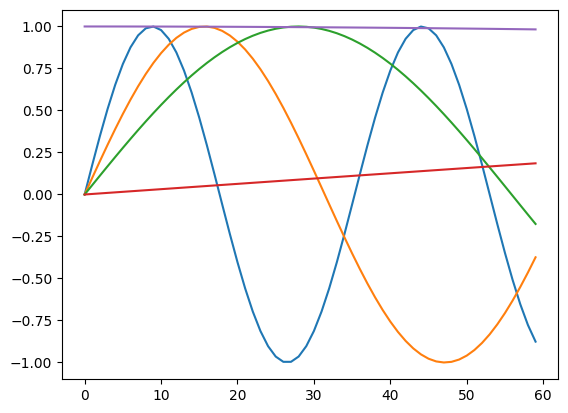

In [22]:
import matplotlib.pyplot as plt

hidden_size = 32
num_steps = 60
positional_encoding = PositionalEncoding(hidden_size, 0)
x = positional_encoding(torch.zeros((1, num_steps, hidden_size)))
p = positional_encoding.p[:,:num_steps,:]

plt.plot(torch.arange(num_steps), p[0,:,6])
plt.plot(torch.arange(num_steps), p[0,:,8])
plt.plot(torch.arange(num_steps), p[0,:,10])
plt.plot(torch.arange(num_steps), p[0,:,20])
plt.plot(torch.arange(num_steps), p[0,:,21])
#plt.plot(torch.arange(num_steps), p[0,:,9])


(<matplotlib.image.AxesImage at 0x25953e85150>, torch.Size([1, 60, 32]))

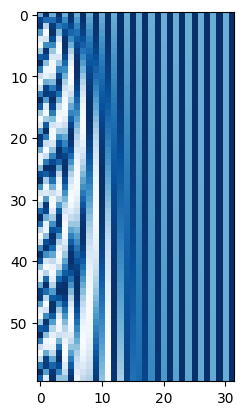

In [20]:
plt.imshow(p[0, :, :], cmap="Blues"),p.shape